# Pandas: Collaborative graded assignment 4
This notebook contains the fourth graded collaborative assignment of the 2023 Coding the Humanities course, and it is based on the [5. Data wrangling with Pandas](../../4_PandasDataWrangling.ipynb) course material.

This is a collaborative assignment. In the text cell below, please include all the names of your group members.

Below that, answer the question using a mix of code cells and text cells in a way that would make your answers understandable to outsiders. To explain your code, you can use commenting (#) and/or text cells, similar to what you see in the course materials.

If you used code or a solution from the internet (such as StackOverflow) or another external resource, please make reference to it (in any format). Unattributed copied code will be considered plagiarism and therefore fraud.


**Authors of this answer:** Leonards Leimanis

# Assignment | Analysing Black Mirror

Black Mirror is a British near-future sci-fi series known for commenting on contemporary social issues, created by Charlie Brooker. Initially aired on the British Channel 4, it later became famous as a Netflix series. The first season was broadcast around the end of 2011, and the fifth season was released in 2019. In this assignment, we will explore this TV series' IMDB ratings, which are available in blackmirror.csv.

As always, feel free to re-use code from different questions.

For the Visualisations:
Do not worry too much about what they look like - we will talk more about visualization next week. But if you want, you can look ahead to notebook 6. The labels Panda puts on your plot will come from the dataframe, so make sure columns have sensible names there to have sensible labels.

Do make sure the visualizations are visible in the notebook when you submit it. Or, you can save your visualisations as a pdf or png file and include them in your zipped submission.

1.   Which director has directed the most number of episodes?

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

local_path = "C:\\Users\\leona\\Documents\\Coding the humanities\\notebooks\\4_Pandas_GradedAssignment\\"
file_path = local_path +'Data\\blackmirror.csv'
movielist = pd.read_csv(file_path, encoding="utf-8")

In [15]:
# Your code here

director_counts = movielist['director'].value_counts()

most_common_director = director_counts.idxmax()

print("The director with the most movies is:", most_common_director)

The director with the most movies is: Owen Harris


2.   Create a function that calculates the frequency of words in a string. Apply it to the description of all of the episodes of Black Mirror. What are the ten most frequent words in the descriptions? Write down your interpretations in the notebook.

In [23]:
# Your code here
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

#defining the word frequency counter function
removable_characters = [',', '(', ')', '.', '?', '!', ':', '~', '`', ';', '"', "'", '»', "<p>", "</p>", "<P>", "</P>"]
def character_removal(string):
    for char in removable_characters:
        string = string.replace(char, '')
    return string

def word_frequency(text):
    text = character_removal(text)
    tokens = word_tokenize(text.lower())
    word_freq = {}
    for word in tokens:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

description_text = ' '.join(movielist['desc'].tolist()) # join all the descriptions into a single string
word_freq = word_frequency(description_text)

#getting the ten most frequent words
most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

#printing the results
print("The ten most frequent words in the descriptions are:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

The ten most frequent words in the descriptions are:
a: 32
to: 17
the: 16
of: 14
and: 10
her: 10
in: 9
that: 8
with: 8
an: 7


The most frequents words in the descriptions of Black Mirror are mostly articles, pronouns, and stop words. I read online that they are usually removed from text analysis.

3.   Create a bar plot/histogram for the IMDB ratings per episode with respect to the episode's title. From this plot, decipher which were the highest and lowest ratest shows.

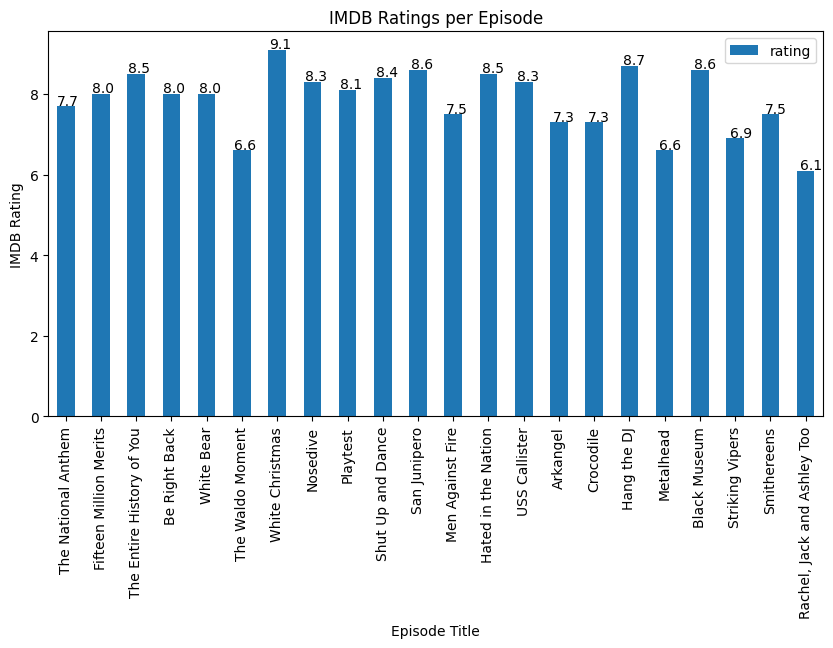

In [61]:
# Your code here

#using the plot from matlab
chrats_list = movielist.plot(kind='bar', x='title', y='rating', figsize=(10,5))
plt.title('IMDB Ratings per Episode')
plt.xlabel('Episode Title')
plt.ylabel('IMDB Rating')

#I also added the rating to the plot so it is more understandable
for p in chrats_list.patches:
    chrats_list.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

4.   Create two different line plots for the IMDB ratings of Black Mirror season 3 and season 4, with the episodes in their episode number order. With these plots, you can compare the ratings of the two seasons throughout. Interpret the visualisation.

Bonus: Extra point if you can put the the two lines in the same plot somehow, either by having a continuous line for season 3 and 4 or by overlaying them.
To filter the dataframe by multiple values, you could use the `isin()` function (https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) to check if an episode is in one of a list of seasons: `df.loc[df.season.isin(seasons)]` where `seasons` is a list.

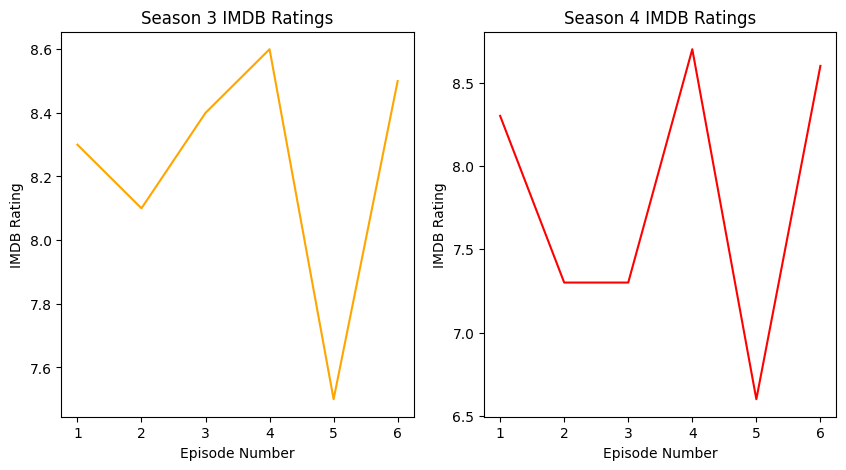

In [57]:
#Your code here
#taking out the season 3 and 4 for use
season3 = movielist[movielist['season']==3]
season4 = movielist[movielist['season']==4]

#sorting the episodes in each season by episode number
season3_sorted = season3.sort_values(by=['episode_number'])
season4_sorted = season4.sort_values(by=['episode_number'])

#creating a plot with two subplots
fig, (plot1, plot2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)

#season 3
plot1.plot(season3_sorted['episode_number'], season3_sorted['rating'], color='orange')
plot1.set_title('Season 3 IMDB Ratings')
plot1.set_xlabel('Episode Number')
plot1.set_ylabel('IMDB Rating')

#season 4
plot2.plot(season4_sorted['episode_number'], season4_sorted['rating'], color='red')
plot2.set_title('Season 4 IMDB Ratings')
plot2.set_xlabel('Episode Number')
plot2.set_ylabel('IMDB Rating')

plt.show()

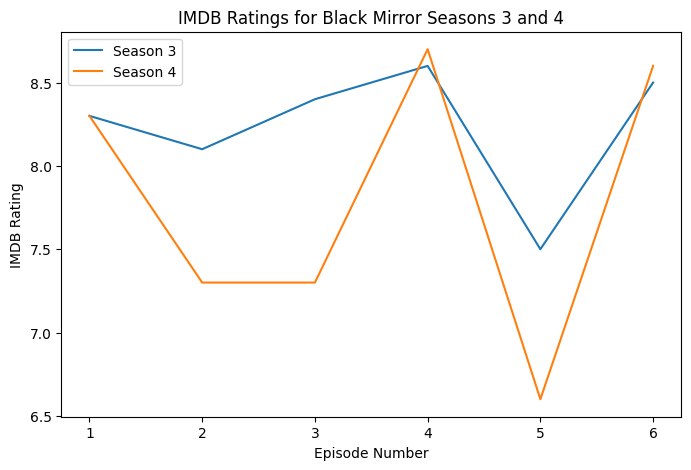

In [60]:
#taking both seasons instead
seasons = [3, 4]
seasons_df = movielist[movielist['season'].isin(seasons)]

#sorting the episodes in each season by episode number
seasons_df_sorted = seasons_df.sort_values(by=['season', 'episode_number'])

#creating the united plot
fig, unitedplot = plt.subplots(figsize=(8, 5))

#plotting the two easons
for season in seasons:
    season_df = seasons_df_sorted[seasons_df_sorted['season']==season]
    unitedplot.plot(season_df['episode_number'], season_df['rating'], label='Season '+str(season))

# Set the plot title, axis labels, and legend
unitedplot.set_title('IMDB Ratings for Black Mirror Seasons 3 and 4')
unitedplot.set_xlabel('Episode Number')
unitedplot.set_ylabel('IMDB Rating')
unitedplot.legend()

# Display the plot
plt.show()